These are data containing all the traces contained in the 'Kolumbo box' described in my thesis. In particular, there are no additional offset-constraints or hand-picked trace-removal.

#### Notebook config

In [7]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
%autoreload 2

In [9]:
import fwipy 
from fwipy import *
from fwipy.config.logging import *
from fwipy.ioapi.segy import SgyFile
lll(40)

In [10]:
help(fwipy)

Help on package fwipy:

NAME
    fwipy

PACKAGE CONTENTS
    config (package)
    dsp (package)
    fd (package)
    fwi (package)
    generic (package)
    ioapi (package)
    ndat (package)
    numeric (package)
    plot (package)
    project (package)
    seismic (package)
    utils

FILE
    /home/kajetan/software/Kolumbo-FWI/fwipy/__init__.py




#### Example lines

In [11]:
tracf = 4112
ep = 8

#### Developing interlacing

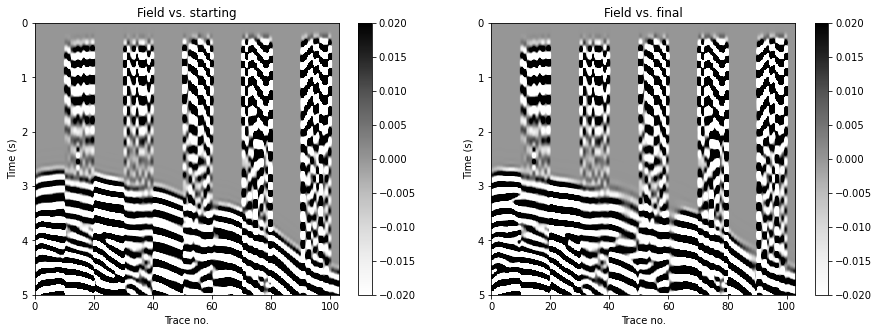

In [155]:
def compare_data(sgy1, sgy2, tracf, ep, dt=0.0025, cmap='Greys', tmin=None, tmax=None,
                vmin=None, vmax=None):
    from fwipy.ndat.arrays import Arr2d, modify_array, interleave_arrays
    a1 = modify_array(sgy1.read(win=dict(tracf=[tracf],ep=[ep]), overwrite=0)[:,0,:], norm='max')
    a2 = modify_array(sgy2.read(win=dict(tracf=[tracf],ep=[ep]), overwrite=0)[:,0,:], norm='max')
    t1 = 0
    t2 = a1.shape[-1] * dt
    x1 = 0
    x2 = a1.shape[0]
    a = interleave_arrays(a1, a2)
    plt.imshow(a.T, aspect='auto', extent=[x1, x2, t2, t1],
               cmap=cmap, vmin=vmin, vmax=vmax)
    plt.colorbar()
    plt.xlabel('Trace no.')
    plt.ylabel('Time (s)')
    plt.ylim(tmax, tmin)
figure(15,5)
plt.subplot(121)
plt.title('Field vs. starting')
compare_data(sgy000, sgyobs, tracf, ep, tmin=0, tmax=5, vmin=-.02, vmax=.02)
plt.subplot(122)
plt.title('Field vs. final')
compare_data(sgy160, sgyobs, tracf, ep, tmin=0, tmax=5, vmin=-.02, vmax=.02)    

#### Old wiggle plots

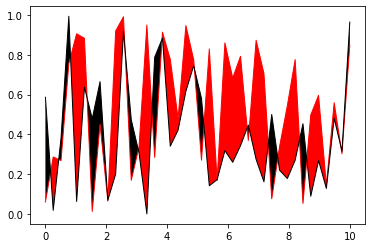

In [5]:
# plot_2_series 
from fwipy.utils import plot_2_series
ns = 40
x = np.linspace(0,10,ns)
y1 = np.random.rand(ns)
y2 = np.random.rand(ns)
plot_2_series(x, y1, y2, c1='k', c2='r')

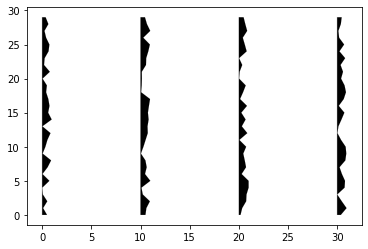

In [57]:
# plot_wiggles
from fwipy.utils import plot_wiggles
Z = np.random.rand(4,1,30)
plot_wiggles(Z)

#### Developing wiggle plots

In [82]:
%matplotlib inline

(5.0, 0.0)

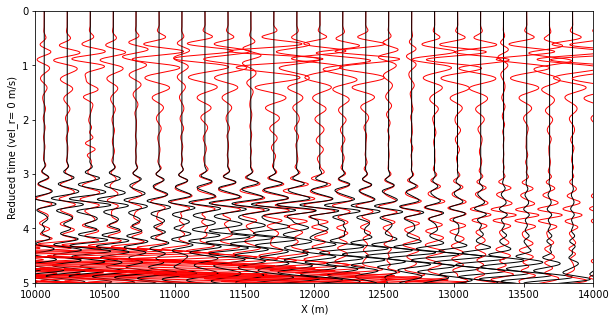

In [151]:
def compare_wiggles(sgy1, sgy2, tracf, ep, dt=0.0025, 
                    A1=100, A2=100,
                    tmin=None, tmax=None,
                 vel_red = 5000, # reduction velocity (m/s)
                 lw = 1, l1='field', l2=None, c_line1 = 'r', c_line2='k', figsize=(10,5),
                cmap='Greys', vmin=None, vmax=None):
    from fwipy.ndat.arrays import Arr2d, modify_array, interleave_arrays
    a1 = modify_array(sgy1.read(win=dict(tracf=[tracf],ep=[ep]), overwrite=0)[:,0,:], norm='max')
    a2 = modify_array(sgy2.read(win=dict(tracf=[tracf],ep=[ep]), overwrite=0)[:,0,:], norm='max')
    ntr, ns = a1.shape
    h = sgy1.read_header(overwrite=0)
    h = h.loc[(h.tracf==tracf) & (h.ep==ep)]
    fig, ax = plt.subplots(figsize=figsize)
    for i, x in enumerate(h.sx):
        if abs(vel_red) > 1e-3:
            t = np.arange(0, ns) * dt - x / vel_red
        else:
            t = np.arange(0, ns) * dt
        offset_weight = h.offset[h.offset.index[i]] / 8000
        ax.plot(x + a1[i] * offset_weight * A1, t, color=c_line1, lw=lw, label=l1)
        ax.plot(x + a2[i] * offset_weight * A2, t, color=c_line2, lw=lw, label=l2)
    ax.invert_yaxis()    
    plt.xlabel('X (m)')
    plt.ylabel('Reduced time (vel_r= %s m/s)' % vel_red)
compare_wiggles(sgyobs, sgy160, tracf, ep, vel_red=0, A1=1000, A2=200)
plt.xlim(1e4, 1.4e4)
plt.ylim(5,0)
# plt.

(5.0, 0.0)

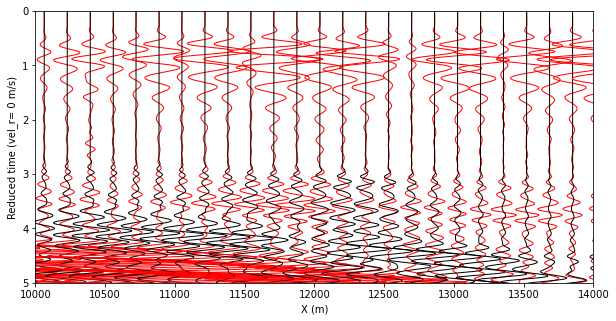

In [153]:
compare_wiggles(sgyobs, sgy000, tracf, ep, vel_red=0, A1=1000, A2=200)
plt.xlim(1e4, 1.4e4)
plt.ylim(5,0)

# Field data
Filtered as in the PhD thesis.

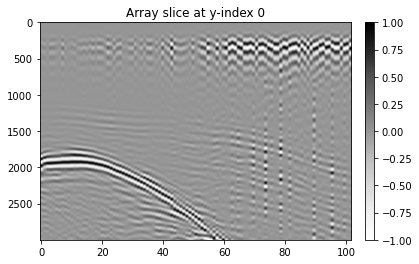

In [55]:
# plot example line 
file_name = 'data_kolumbo_PhD_all_traces_field_filtered.sgy'
data_path = '../data/'
sgy = SgyFile(file_name, data_path)
sgyobs = sgy
_ = sgy.plot(win=dict(tracf=[tracf],ep=[ep]), overwrite=0, norm='max')

# Synthetics
From the starting model.

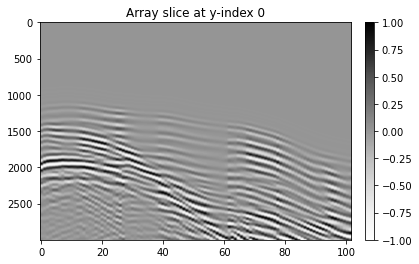

In [149]:
# plot example line 
file_name = 'data_kolumbo_PhD_all_traces_synth_it000.sgy'
data_path = '../data/'
sgy = SgyFile(file_name, data_path)
sgy000 = sgy
_ = sgy.plot(win=dict(tracf=[tracf],ep=[ep]), overwrite=0, norm='max')

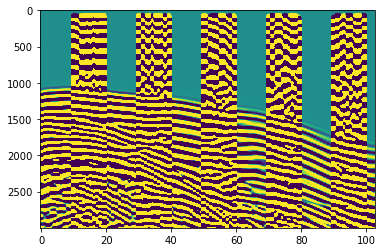

In [94]:
# plot example line 
a1 = sgy000.read(win=dict(tracf=[tracf],ep=[ep]), overwrite=0, norm='max')[:,0,:]
a2 = sgyobs.read(win=dict(tracf=[tracf],ep=[ep]), overwrite=0, norm='max')[:,0,:]
from fullwavepy.ndat.arrays import interleave_arrays
a = interleave_arrays(a1, a2)
plt.imshow(a.T, aspect='auto', vmin=-1, vmax=1)

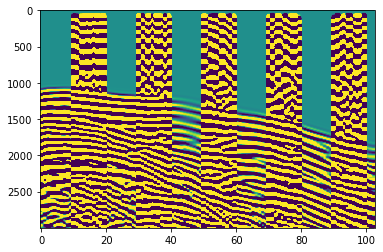

In [95]:
# plot example line 
a1 = sgy020.read(win=dict(tracf=[tracf],ep=[ep]), overwrite=0, norm='max')[:,0,:]
a2 = sgyobs.read(win=dict(tracf=[tracf],ep=[ep]), overwrite=0, norm='max')[:,0,:]
from fullwavepy.ndat.arrays import interleave_arrays
a = interleave_arrays(a1, a2)
plt.imshow(a.T, aspect='auto', vmin=-1, vmax=1)

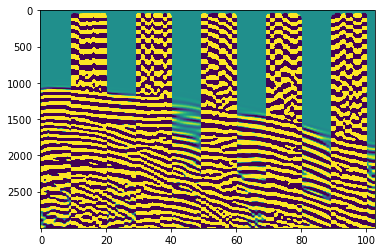

In [97]:
# plot example line 
a1 = sgy080.read(win=dict(tracf=[tracf],ep=[ep]), overwrite=0, norm='max')[:,0,:]
a2 = sgyobs.read(win=dict(tracf=[tracf],ep=[ep]), overwrite=0, norm='max')[:,0,:]
from fullwavepy.ndat.arrays import interleave_arrays
a = interleave_arrays(a1, a2)
plt.imshow(a.T, aspect='auto', vmin=-1, vmax=1)

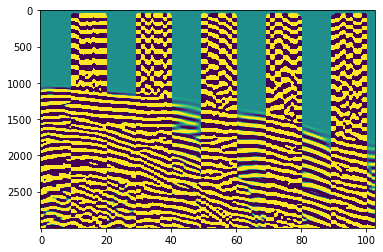

In [99]:
# plot example line 
a1 = sgy160.read(win=dict(tracf=[tracf],ep=[ep]), overwrite=0, norm='max')[:,0,:]
a2 = sgyobs.read(win=dict(tracf=[tracf],ep=[ep]), overwrite=0, norm='max')[:,0,:]
from fullwavepy.ndat.arrays import interleave_arrays
a = interleave_arrays(a1, a2)
plt.imshow(a.T, aspect='auto', vmin=-1, vmax=1)

# Synthetics
From the model after 020 iterations.

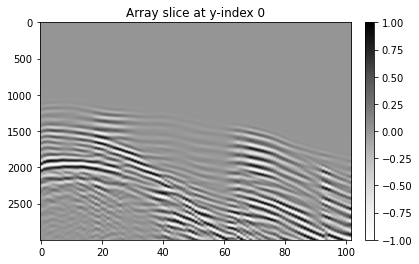

In [93]:
# plot example line 
file_name = 'p14it020syn-Synthetic.sgy'
data_path = '../data/'
sgy = SgyFile(file_name, data_path)
sgy020 = sgy
_ = sgy.plot(win=dict(tracf=[tracf],ep=[ep]), overwrite=0, norm='max')

# Synthetics
From the model after 080 iterations.

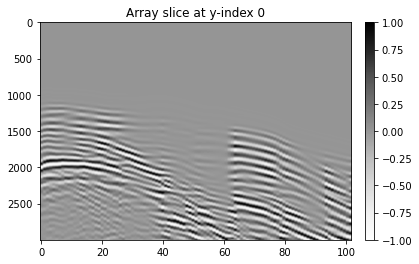

In [96]:
# plot example line 
file_name = 'p14it080syn-Synthetic.sgy'
data_path = '../data/'
sgy = SgyFile(file_name, data_path)
sgy080 = sgy
_ = sgy.plot(win=dict(tracf=[tracf],ep=[ep]), overwrite=0, norm='max')

# Synthetics
From the model after 160 iterations.

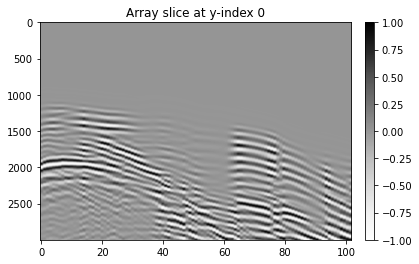

In [54]:
# plot example line 
file_name = 'p14it160syn-Synthetic.sgy'
data_path = '../data/'
sgy = SgyFile(file_name, data_path)
sgy160 = sgy
_ = sgy.plot(win=dict(tracf=[tracf],ep=[ep]), overwrite=0, norm='max')

# Interleaving
Field vs. synthetics

In [156]:
# read ids 
file_name = 'method_s01-Synthetic.sgy'
data_path = '../data/'
sgy = SgyFile(file_name, data_path)
sgy1 = sgy
OBS_ids = sorted(sgy.read_header().tracf.unique())
print(OBS_ids)
shot_line_ids = sorted(sgy.head.ep.unique())
print(shot_line_ids)

[4104, 4105, 4109, 4110, 4112, 4123, 4124, 4125, 4137, 4138, 4139, 4157, 4158, 4176, 4177, 4178]
[5, 6, 7, 8, 9, 10, 22, 23, 26, 27, 30, 31, 37, 38]


In [162]:
def compare_start_vs_final_fits(sgyobs, sgy000, sgyrec, tracf, ep, tmin=0, tmax=5, vmax=.02):
    vmin = -vmax
    figure(15,5)
    plt.subplot(121)
    plt.title('Field vs. starting')
    compare_data(sgy000, sgyobs, tracf, ep, tmin=tmin, tmax=tmax, vmin=vmin, vmax=vmax)
    plt.subplot(122)
    plt.title('Field vs. recovered')
    compare_data(sgyrec, sgyobs, tracf, ep, tmin=tmin, tmax=tmax, vmin=vmin, vmax=vmax)    

In [166]:
%%time 
for it in [20, 80, 160]:
    sgysyn = {20: sgy020, 80: sgy080, 160: sgy160}
    for sid in OBS_ids:
        for lid in shot_line_ids:
            try:
                compare_start_vs_final_fits(sgyobs, sgy000, sgysyn[it], sid, lid)
            except AssertionError:
                print('WARNING no data for OBS %s, line %s' % (sid, lid))
            plt.savefig('figures/interlaced_broadband/p14_BB_OBS%s_line%s_it%s.png' % (sid, str(lid).rjust(3, '0'), str(it).rjust(3, '0')))
            plt.close()

CPU times: user 8min 15s, sys: 5min 34s, total: 13min 50s
Wall time: 1h 29min 55s


# ...